<a href="https://colab.research.google.com/github/deepakshimpi001/DATA-SCIENCE-ASSIGNMENT/blob/main/Random_Forest_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Random Forest
 
# Assignment


# About the data: 
# Let’s consider a Company dataset with around 10 variables and 400 records. 
# The attributes are as follows: 
#  Sales -- Unit sales (in thousands) at each location
#  Competitor Price -- Price charged by competitor at each location
#  Income -- Community income level (in thousands of dollars)
#  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
#  Population -- Population size in region (in thousands)
#  Price -- Price company charges for car seats at each site
#  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
#  Age -- Average age of the local population
#  Education -- Education level at each location
#  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
#  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
# The company dataset looks like this: 
 
# Problem Statement:
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/Company_Data.csv")

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


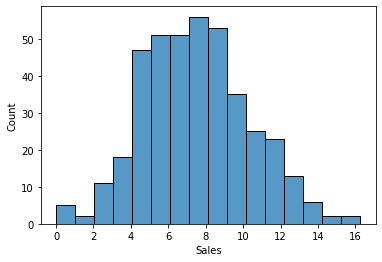

In [5]:
sns.histplot(df["Sales"])
plt.show()

In [6]:
#converting from categorical data
#data['High'] = data.Sales.map(lambda x: 1 if x>8 else 0)
df["Sales"]=np.where(df["Sales"]>8,"High","LOW")

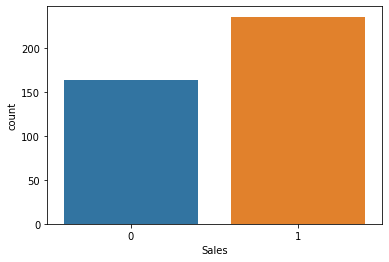

In [33]:
sns.countplot(x="Sales",data=df)

In [7]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,LOW,117,100,4,466,97,Medium,55,14,Yes,Yes
4,LOW,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
df.dtypes

Sales          object
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [10]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
x_label=LabelEncoder()
df["Sales"]=x_label.fit_transform(df["Sales"])


In [13]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,0,111,48,16,260,83,Good,65,10,Yes,Yes
2,0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1,141,64,3,340,128,Bad,38,13,Yes,No


In [14]:
data=pd.get_dummies(df,drop_first=True)

In [15]:
x=data.drop("Sales",axis=1)
y=data["Sales"]

In [16]:
# Bagged Decision Trees for Classification

In [17]:
from sklearn.model_selection import KFold,cross_val_score

In [18]:
from pandas.core.common import random_state
kfold=KFold(n_splits=10)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [20]:
cart=DecisionTreeClassifier()
num_tree=10

In [21]:
model=BaggingClassifier(base_estimator=cart,n_estimators=num_tree,random_state=7)

In [22]:
result=cross_val_score(model,x,y,cv=kfold)

In [23]:
print(result.mean())

0.7925


In [24]:
# Random Forest Classification

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
num_trees = 200
max_features = 3
kfold = KFold(n_splits=10)
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results2 = cross_val_score(model2, x,y, cv=kfold)
print(results2.mean())

0.8150000000000001


In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
model3=RandomForestClassifier()

In [37]:
param_grid = { 
    'n_estimators': [100,150,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [46]:
CV_model3 = GridSearchCV(estimator=model3, param_grid=param_grid, cv= 5)
CV_model3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 500]})

In [48]:
CV_model3.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 150}

In [49]:
model4=RandomForestClassifier(random_state=42,n_estimators=150,max_depth=6,criterion="gini",max_features="sqrt")

In [50]:
model4.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=150,
                       random_state=42)

In [53]:
y_pred=model4.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,y_pred)

0.7625